In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  

In [2]:
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('../data/data.csv')

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.shape

(52416, 9)

In [5]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [7]:
df.columns


Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [8]:
df.rename(columns={
    "Zone 1 Power Consumption": "z1",
    "Zone 2  Power Consumption": "z2",
    "Zone 3  Power Consumption": "z3"
}, inplace=True)

In [9]:

# Create a MinMaxScaler object
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

df_normalized = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=[np.number]).columns)
df_normalized["DateTime"] = df["DateTime"]
df_normalized

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z1,z2,z3,DateTime
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,0.262361,0.343368,1/1/2017 0:00
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,0.374886,0.340731,1/1/2017 0:10
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,0.362116,0.329626,1/1/2017 0:20
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,0.339738,0.311165,1/1/2017 0:30
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834,0.322796,0.300199,1/1/2017 0:40
...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.450675,0.634246,0.212301,12/30/2017 23:10
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.431618,0.608847,0.203864,12/30/2017 23:20
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.409703,0.579491,0.188927,12/30/2017 23:30
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.393187,0.559197,0.181874,12/30/2017 23:40


Temperature


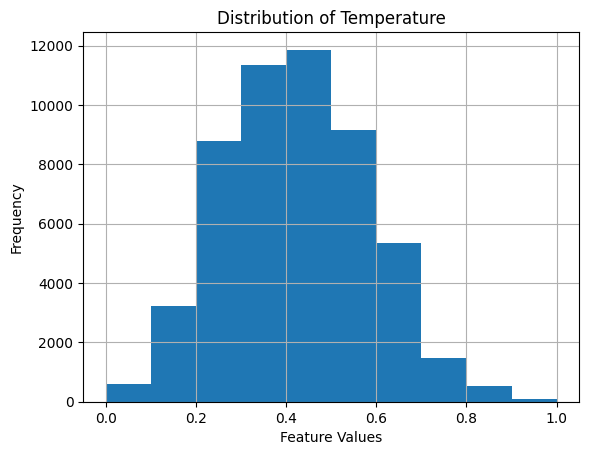

Humidity


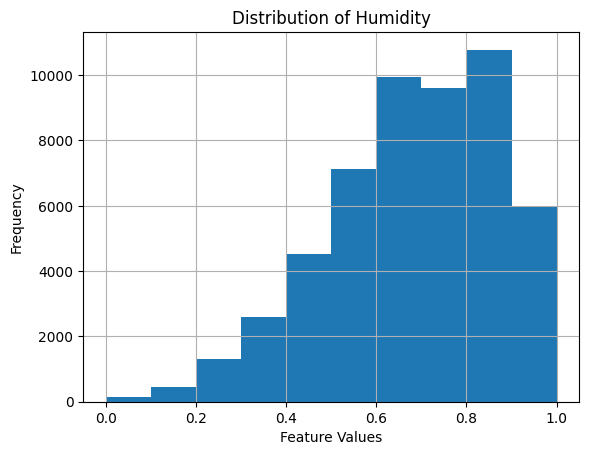

Wind Speed


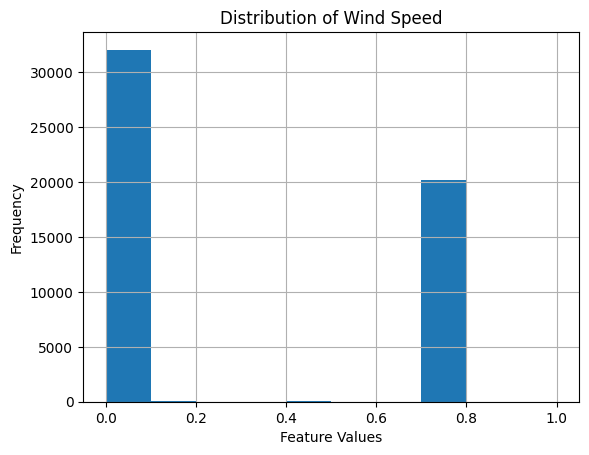

general diffuse flows


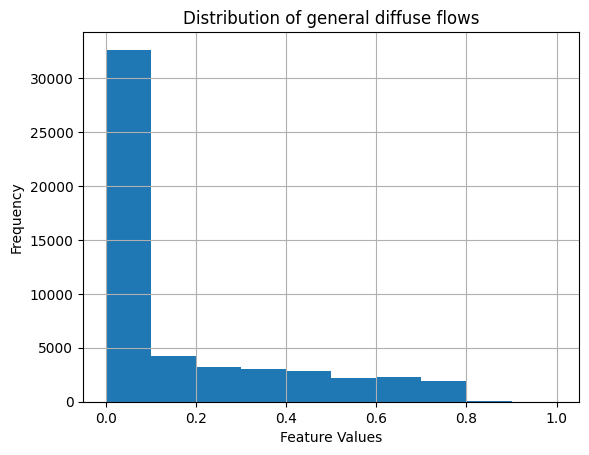

diffuse flows


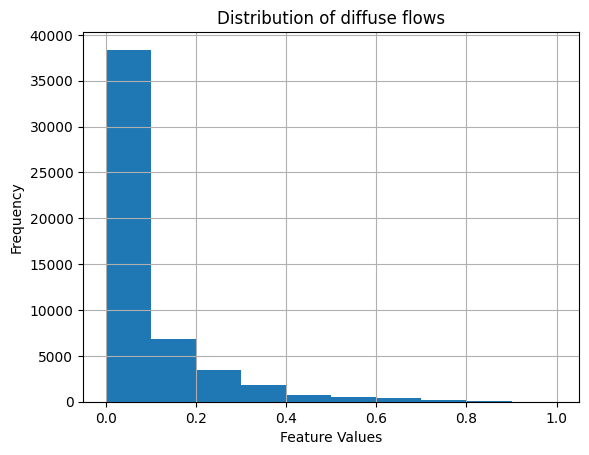

z1


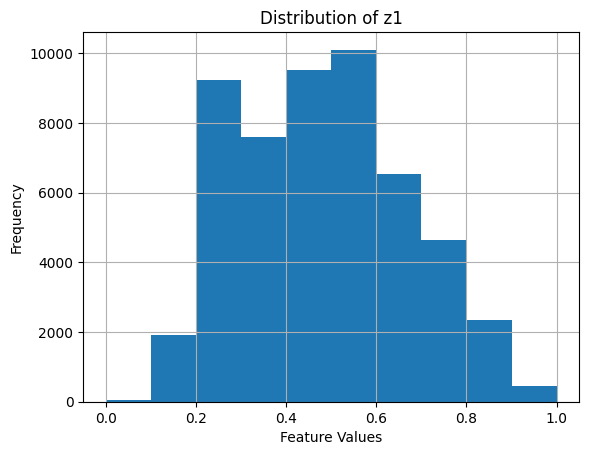

z2


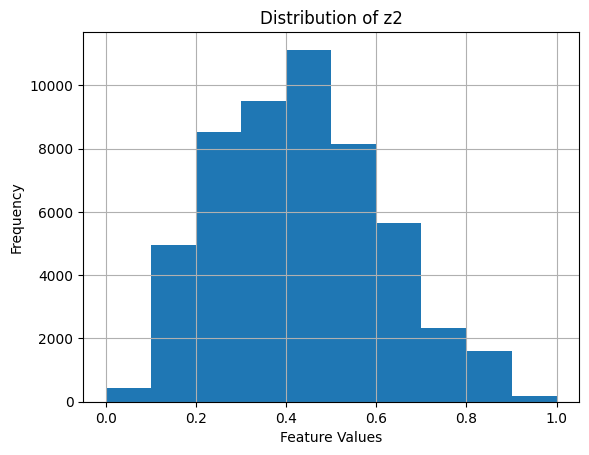

z3


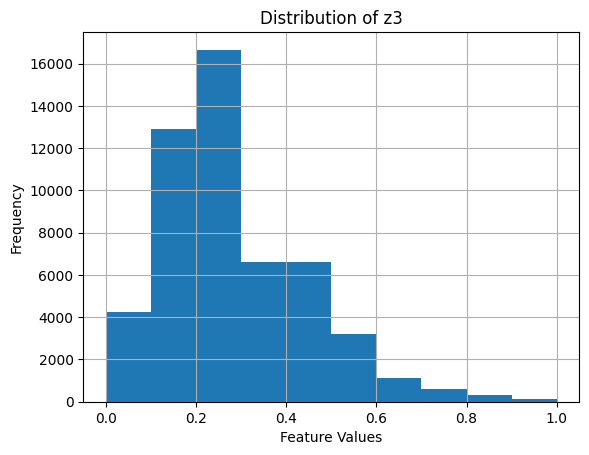

In [10]:
for col in df_normalized.drop("DateTime", axis=1).columns:
    print(col)
    df_normalized[col].hist()
    plt.xlabel('Feature Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+str(col))
    plt.show()


In [11]:
len(df_normalized["Wind Speed"].unique())

548

                       Temperature  Humidity  Wind Speed  \
Temperature               1.000000 -0.460243    0.477109   
Humidity                 -0.460243  1.000000   -0.135853   
Wind Speed                0.477109 -0.135853    1.000000   
general diffuse flows     0.460294 -0.468138    0.133733   
diffuse flows             0.196522 -0.256886   -0.000972   
z1                        0.440221 -0.287421    0.167444   
z2                        0.382428 -0.294961    0.146413   
z3                        0.489527 -0.233022    0.278641   

                       general diffuse flows  diffuse flows        z1  \
Temperature                         0.460294       0.196522  0.440221   
Humidity                           -0.468138      -0.256886 -0.287421   
Wind Speed                          0.133733      -0.000972  0.167444   
general diffuse flows               1.000000       0.564718  0.187965   
diffuse flows                       0.564718       1.000000  0.080274   
z1                   

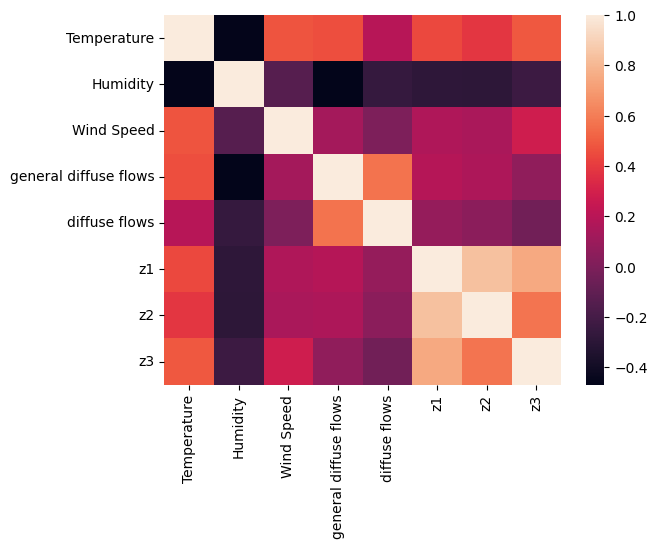

In [12]:
corr = df_normalized.drop(['DateTime'], axis=1).corr()
print(corr)
sns.heatmap(corr)  # Basic heatmap
plt.show()

# Zone 1 Analysis
---

In [13]:
df_zone_1 = df_normalized.drop(["z2", "z3"], axis=1)
df_zone_1.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z1,DateTime
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.526251,1/1/2017 0:00
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.415545,1/1/2017 0:10
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.397623,1/1/2017 0:20
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.374149,1/1/2017 0:30
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.350834,1/1/2017 0:40


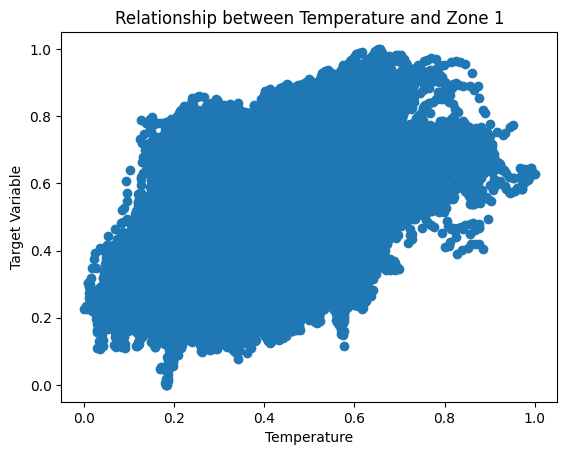

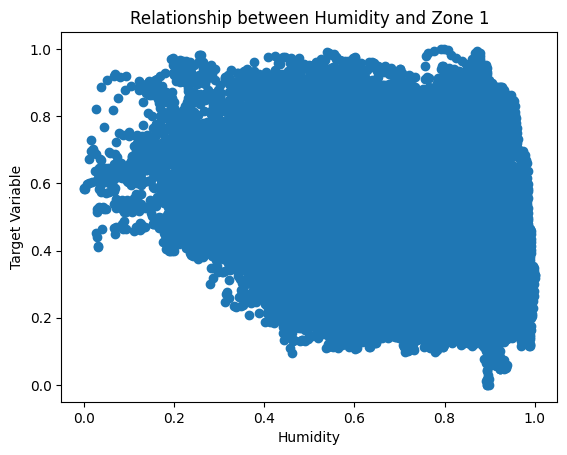

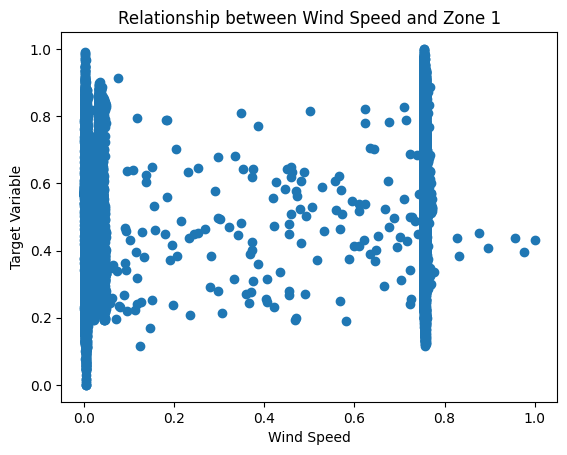

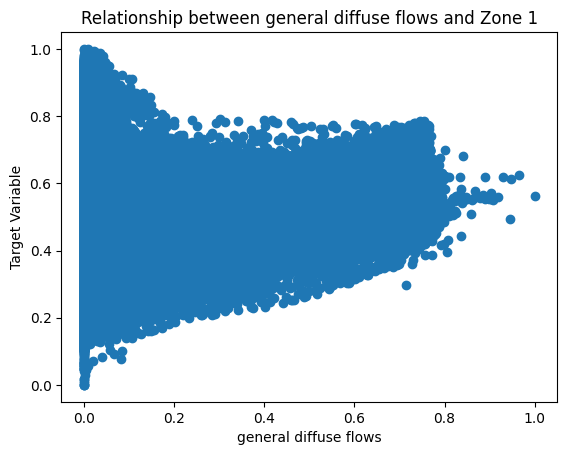

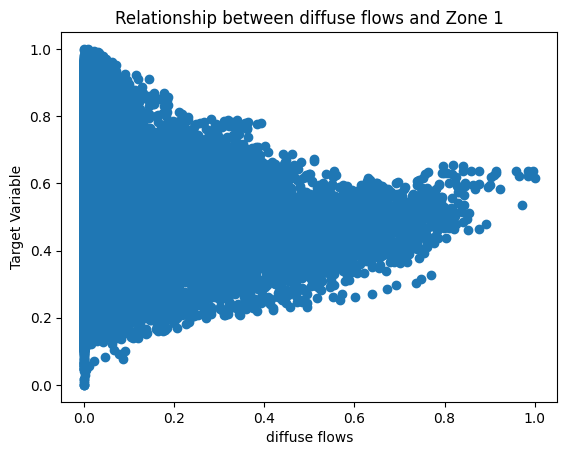

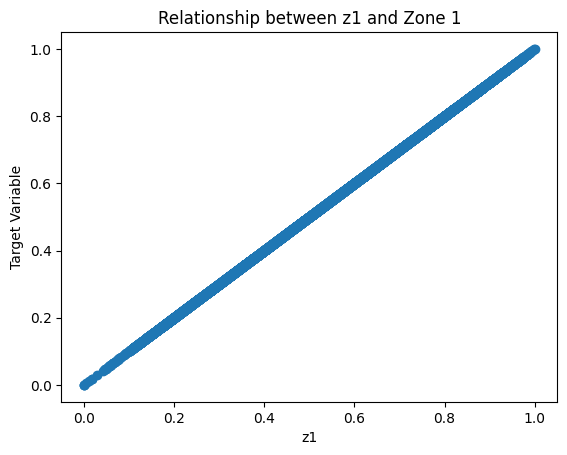

In [14]:
for col in df_zone_1.drop("DateTime", axis=1).columns:
    plt.scatter(df_zone_1[col], df_zone_1['z1'])
    plt.xlabel(str(col))
    plt.ylabel('Target Variable')
    plt.title('Relationship between '+str(col)+' and Zone 1')
    plt.show()


---

# Zone 2 Analysis

In [15]:
df_zone_2 = df_normalized.drop(["z1", "z3"], axis=1)
df_zone_2.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z2,DateTime
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.262361,1/1/2017 0:00
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.374886,1/1/2017 0:10
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.362116,1/1/2017 0:20
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.339738,1/1/2017 0:30
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.322796,1/1/2017 0:40


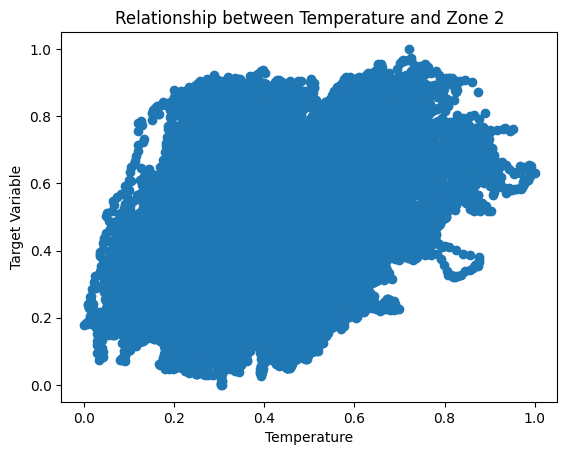

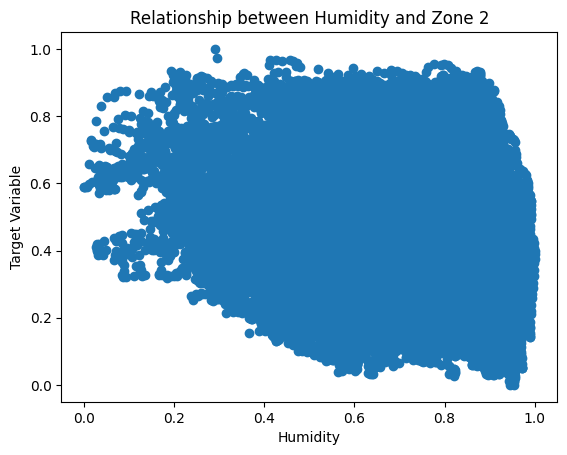

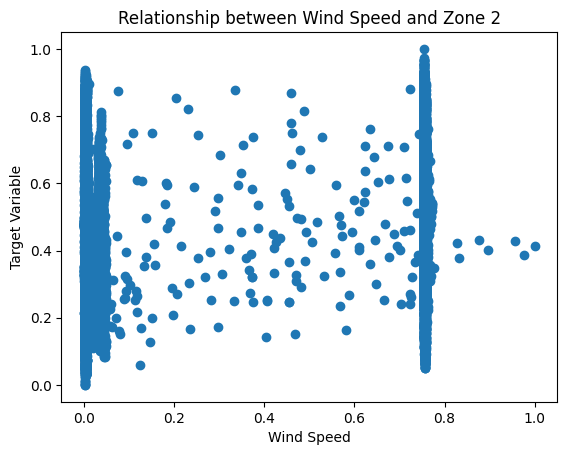

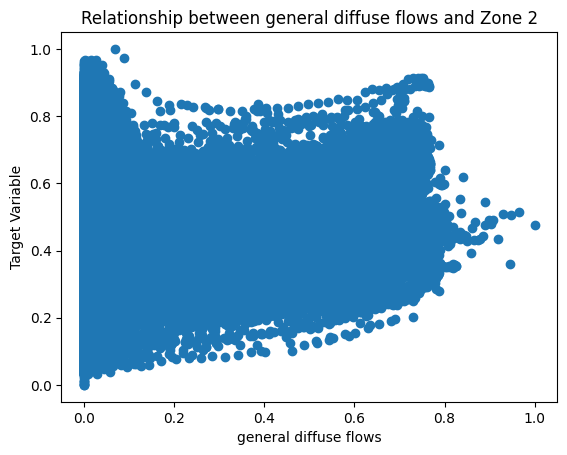

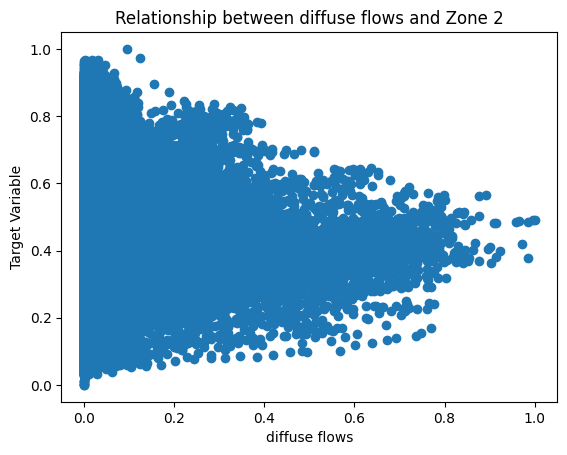

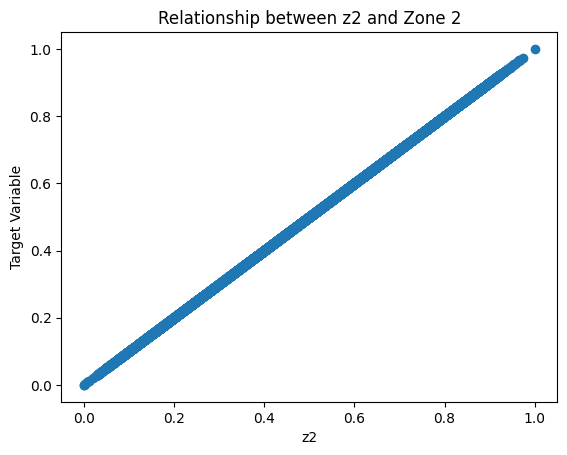

In [16]:
for col in df_zone_2.drop("DateTime", axis=1).columns:
    plt.scatter(df_zone_2[col], df_zone_2['z2'])
    plt.xlabel(str(col))
    plt.ylabel('Target Variable')
    plt.title('Relationship between '+str(col)+' and Zone 2')
    plt.show()



---

# Zone 3 Analysis

In [17]:
df_zone_3 = df_normalized.drop(["z1", "z2"], axis=1)
df_zone_3.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z3,DateTime
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.343368,1/1/2017 0:00
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.340731,1/1/2017 0:10
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.329626,1/1/2017 0:20
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.311165,1/1/2017 0:30
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.300199,1/1/2017 0:40


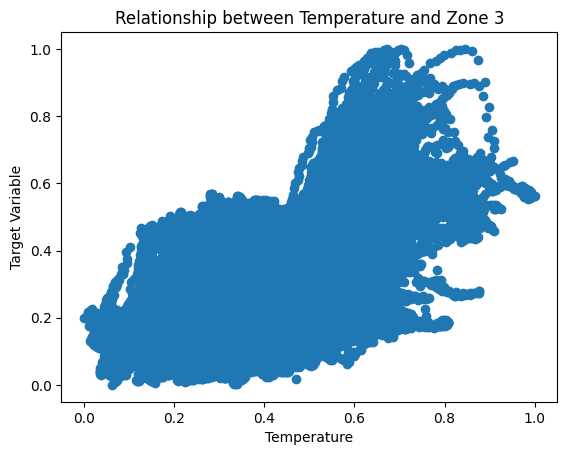

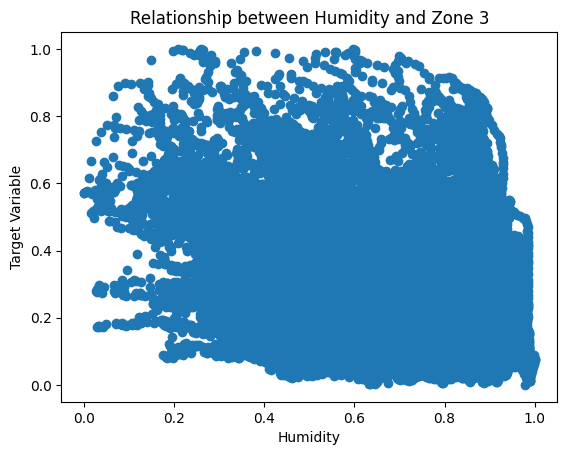

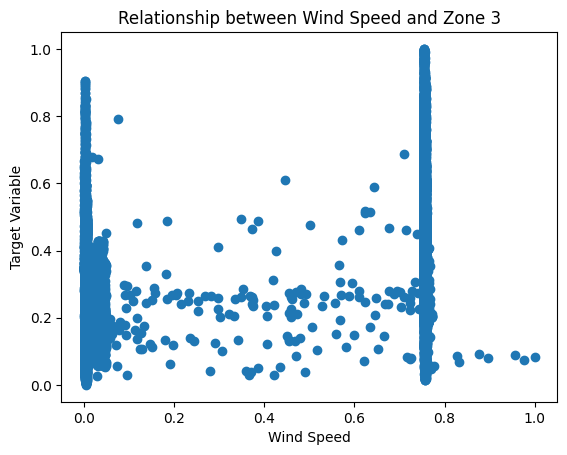

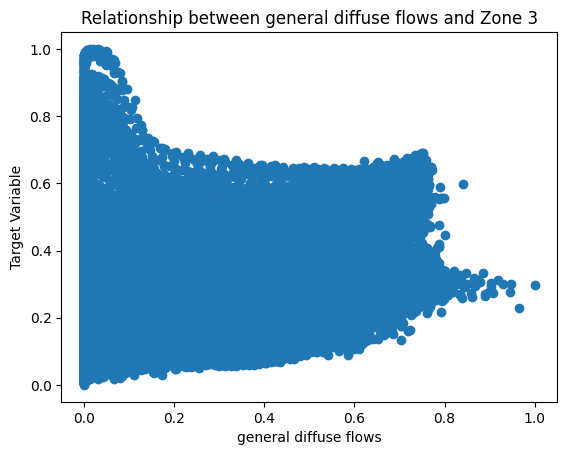

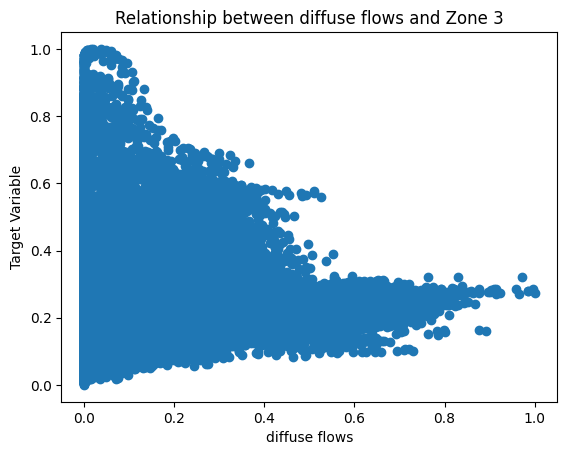

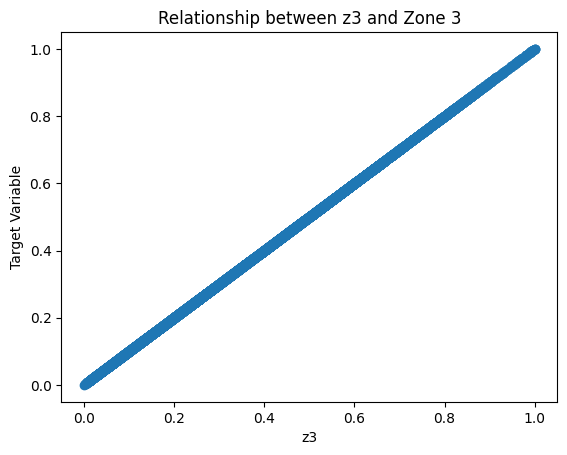

In [18]:
for col in df_zone_3.drop("DateTime", axis=1).columns:
    plt.scatter(df_zone_3[col], df_zone_3['z3'])
    plt.xlabel(str(col))
    plt.ylabel('Target Variable')
    plt.title('Relationship between '+str(col)+' and Zone 3')
    plt.show()



In [19]:
df["titouan"]=df["z1"]+df["z2"]+df["z3"]
df = df.drop(["z1", "z2", "z3"], axis =1)
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,titouan
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,70425.53544
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,69320.84387
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,67803.22193
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,65489.23209
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,63650.44627


In [20]:

# Create a MinMaxScaler object
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

df_normalized_city = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=[np.number]).columns)
df_normalized_city["DateTime"] = df["DateTime"]
df_normalized_city

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,titouan,DateTime
0,0.090091,0.748382,0.005130,0.000040,0.000115,0.345303,1/1/2017 0:00
1,0.086146,0.756770,0.005130,0.000057,0.000079,0.333964,1/1/2017 0:10
2,0.083399,0.756770,0.004663,0.000050,0.000095,0.318386,1/1/2017 0:20
3,0.078176,0.762761,0.005130,0.000075,0.000091,0.294634,1/1/2017 0:30
4,0.072736,0.771148,0.004819,0.000038,0.000079,0.275760,1/1/2017 0:40
...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000031,0.000091,0.369656,12/30/2017 23:10
52412,0.100645,0.734004,0.004974,0.000040,0.000088,0.351033,12/30/2017 23:20
52413,0.099366,0.736401,0.005596,0.000069,0.000067,0.327335,12/30/2017 23:30
52414,0.095504,0.738797,0.004663,0.000053,0.000083,0.311815,12/30/2017 23:40


(array([ 1524., 11367.,  8115., 13536.,  5709.,  7206.,  3527.,   709.,
          562.,   161.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

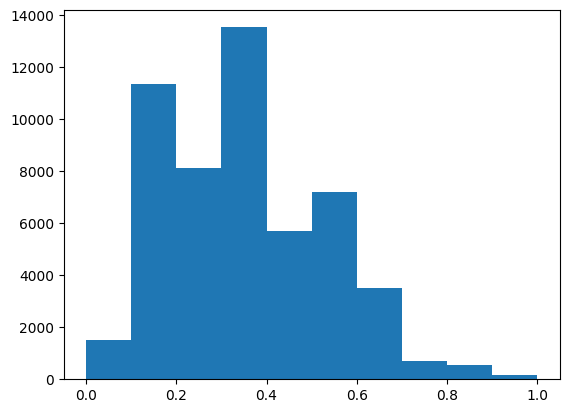

In [22]:
plt.hist(df_normalized_city["titouan"])

In [23]:
print(corr)

                       Temperature  Humidity  Wind Speed  \
Temperature               1.000000 -0.460243    0.477109   
Humidity                 -0.460243  1.000000   -0.135853   
Wind Speed                0.477109 -0.135853    1.000000   
general diffuse flows     0.460294 -0.468138    0.133733   
diffuse flows             0.196522 -0.256886   -0.000972   
z1                        0.440221 -0.287421    0.167444   
z2                        0.382428 -0.294961    0.146413   
z3                        0.489527 -0.233022    0.278641   

                       general diffuse flows  diffuse flows        z1  \
Temperature                         0.460294       0.196522  0.440221   
Humidity                           -0.468138      -0.256886 -0.287421   
Wind Speed                          0.133733      -0.000972  0.167444   
general diffuse flows               1.000000       0.564718  0.187965   
diffuse flows                       0.564718       1.000000  0.080274   
z1                   

                       Temperature  Humidity  Wind Speed  \
Temperature               1.000000 -0.460243    0.477109   
Humidity                 -0.460243  1.000000   -0.135853   
Wind Speed                0.477109 -0.135853    1.000000   
general diffuse flows     0.460294 -0.468138    0.133733   
diffuse flows             0.196522 -0.256886   -0.000972   
titouan                   0.488238 -0.299059    0.221706   

                       general diffuse flows  diffuse flows   titouan  
Temperature                         0.460294       0.196522  0.488238  
Humidity                           -0.468138      -0.256886 -0.299059  
Wind Speed                          0.133733      -0.000972  0.221706  
general diffuse flows               1.000000       0.564718  0.150368  
diffuse flows                       0.564718       1.000000  0.032068  
titouan                             0.150368       0.032068  1.000000  


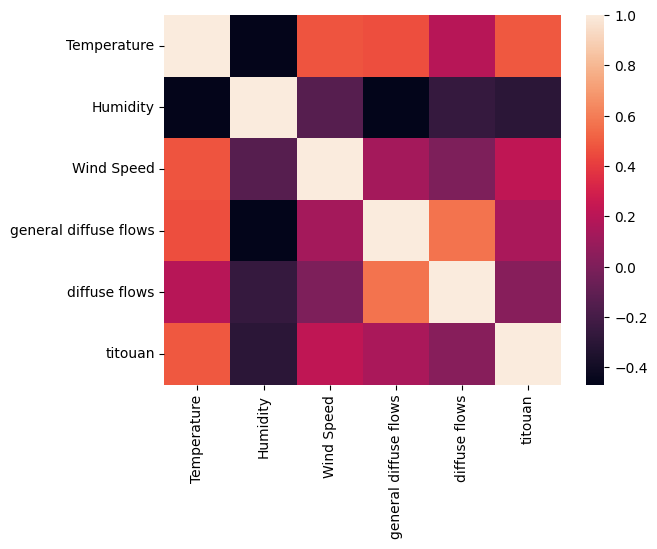

In [21]:
corr_ = df_normalized_city.drop(['DateTime'], axis=1).corr()
print(corr_)
sns.heatmap(corr_)  # Basic heatmap
plt.show()